In [ ]:
pip install pandas scikit-learn statsmodels

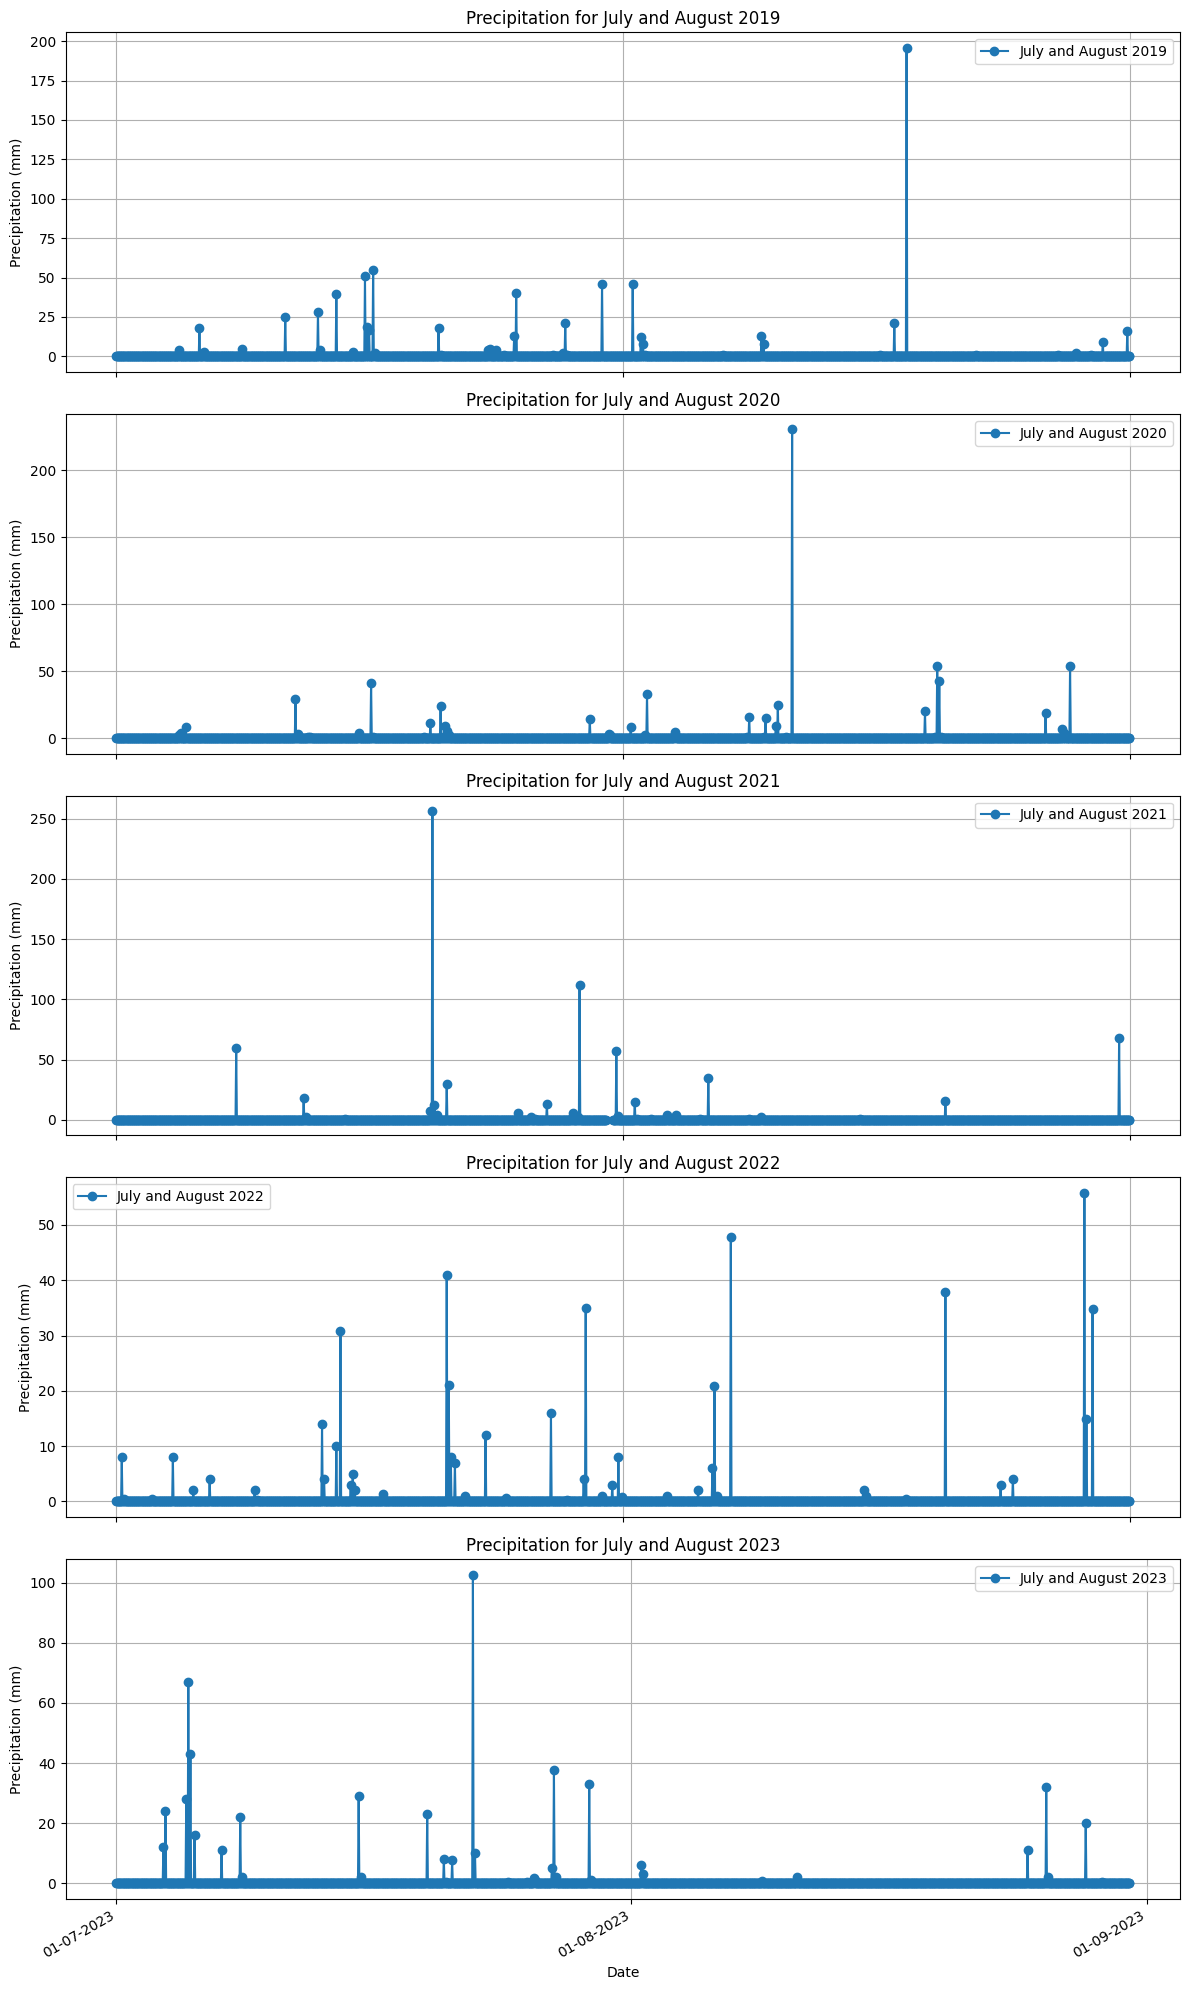

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
file_path = '/content/2019-2023_july_to_aug_weather (1).csv'
weather_data = pd.read_csv(file_path)

# Combine date and time into a single datetime column with the correct format
weather_data['datetime'] = pd.to_datetime(weather_data['date'] + ' ' + weather_data['time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop rows with NaT in the datetime column
weather_data = weather_data.dropna(subset=['datetime'])

# Drop the original date and time columns
weather_data = weather_data.drop(columns=['date', 'time'])

# Filter data for July and August
weather_data = weather_data[weather_data['datetime'].dt.month.isin([7, 8])]

# Create a list of unique years in the dataset
years = weather_data['datetime'].dt.year.unique()

# Set up the figure and subplots
fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(12, 4 * len(years)))

# Plot data for each year
for i, year in enumerate(sorted(years)):
    ax = axes[i]
    year_data = weather_data[weather_data['datetime'].dt.year == year]
    ax.plot(year_data['datetime'], year_data['precip'], marker='o', linestyle='-', label=f'July and August {year}')
    ax.set_title(f'Precipitation for July and August {year}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Precipitation (mm)')
    ax.legend()
    ax.grid(True)
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%Y'))
    ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    fig.autofmt_xdate()  # Auto format the x-axis dates to fit
plt.subplots_adjust(hspace=0.2)
# Adjust layout to avoid clipping of labels
plt.tight_layout()
plt.show()


In [3]:
# Add year and month columns for aggregation
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['month'] = weather_data['datetime'].dt.month

# Number of rainy days per month and year
rainy_days = weather_data[weather_data['precip'] > 0].groupby(['year', 'month']).size()
print("Number of rainy days per month and year:")
print(rainy_days)

# Total precipitation per month
total_precipitation = weather_data.groupby(['year', 'month'])['precip'].sum()
print("\nTotal precipitation per month:")
print(total_precipitation)

# Calculate the maximum continuous hours of rain
def max_continuous_rain_hours(df):
    df = df.sort_values('datetime')
    df['rain'] = df['precip'] > 0
    df['rain_streak'] = (df['rain'] != df['rain'].shift()).cumsum()
    rain_streaks = df[df['rain']]['rain_streak'].value_counts()
    return rain_streaks.max()

max_rain_hours_per_year_month = weather_data.groupby(['year', 'month']).apply(max_continuous_rain_hours)
print("\nMaximum continuous hours of rain per month and year:")
print(max_rain_hours_per_year_month)

Number of rainy days per month and year:
year  month
2019  7        41
      8        28
2020  7        34
      8        37
2021  7        30
      8        17
2022  7        39
      8        29
2023  7        38
      8        19
dtype: int64

Total precipitation per month:
year  month
2019  7        431.3682
      8        338.7030
2020  7        166.7620
      8        553.7650
2021  7        591.0800
      8        147.6440
2022  7        254.1440
      8        233.6720
2023  7        489.5410
      8         77.4760
Name: precip, dtype: float64

Maximum continuous hours of rain per month and year:
year  month
2019  7        1
      8        2
2020  7        2
      8        2
2021  7        1
      8        1
2022  7        1
      8        1
2023  7        2
      8        1
dtype: int64


In [4]:

# Add year and month columns for aggregation
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['month'] = weather_data['datetime'].dt.month

# Convert the hourly data to daily data by taking the maximum precipitation value per day
weather_data['date'] = weather_data['datetime'].dt.date
daily_data = weather_data.groupby(['year', 'month', 'date'])['precip'].max().reset_index()

# Number of rainy days per month and year
daily_rainy_days = daily_data[daily_data['precip'] > 0].groupby(['year', 'month']).size()
print("Number of rainy days per month and year:")
month_names = {7: 'July', 8: 'August'}
daily_rainy_days = daily_rainy_days.rename(index=month_names)
print(daily_rainy_days)

# Total precipitation per month
total_precipitation = weather_data.groupby(['year', 'month'])['precip'].sum()
print("\nTotal precipitation per month:")
month_names = {7: 'July', 8: 'August'}
total_precipitation = total_precipitation.rename(index=month_names)
print(total_precipitation)

# Maximum daily precipitation per month and year
max_daily_precipitation = daily_data.groupby(['year', 'month'])['precip'].max()
print("\nMaximum daily precipitation per month and year:")
max_daily_precipitation = max_daily_precipitation.rename(index=month_names)
print(max_daily_precipitation)


Number of rainy days per month and year:
year  month 
2019  July      20
      August    18
2020  July      16
      August    19
2021  July      17
      August    13
2022  July      21
      August    16
2023  July      17
      August    14
dtype: int64

Total precipitation per month:
year  month 
2019  July      431.3682
      August    338.7030
2020  July      166.7620
      August    553.7650
2021  July      591.0800
      August    147.6440
2022  July      254.1440
      August    233.6720
2023  July      489.5410
      August     77.4760
Name: precip, dtype: float64

Maximum daily precipitation per month and year:
year  month 
2019  July       54.7878
      August    195.7790
2020  July       40.8720
      August    230.5510
2021  July      256.1010
      August     67.8720
2022  July       40.9890
      August     55.7950
2023  July      102.7760
      August     31.9160
Name: precip, dtype: float64


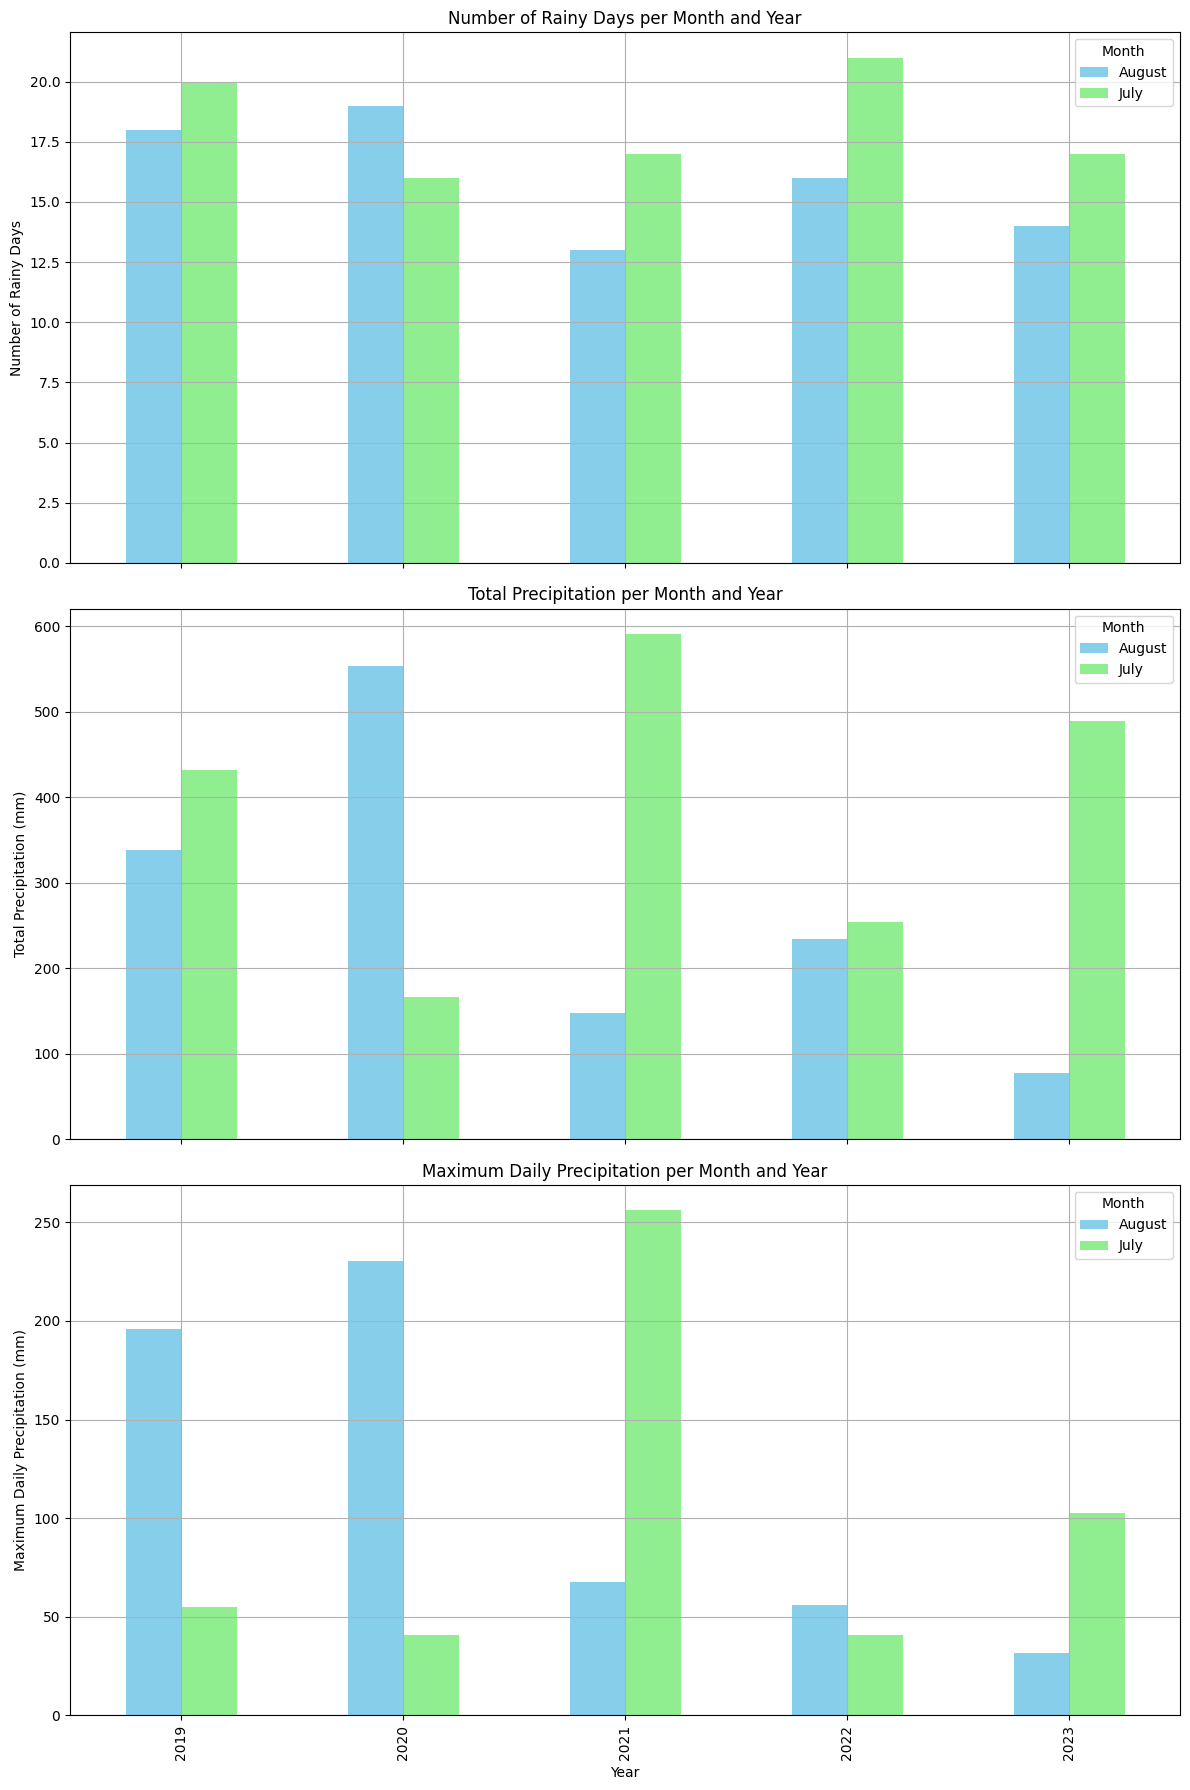

In [ ]:
# Number of rainy days per month and year
daily_rainy_days = daily_data[daily_data['precip'] > 0].groupby(['year', 'month']).size()
daily_rainy_days = daily_rainy_days.rename(index={7: 'July', 8: 'August'})

# Total precipitation per month
total_precipitation = weather_data.groupby(['year', 'month'])['precip'].sum()
total_precipitation = total_precipitation.rename(index={7: 'July', 8: 'August'})

# Maximum daily precipitation per month and year
max_daily_precipitation = daily_data.groupby(['year', 'month'])['precip'].max()
max_daily_precipitation = max_daily_precipitation.rename(index={7: 'July', 8: 'August'})

# Convert to DataFrame for better plotting
daily_rainy_days_df = daily_rainy_days.unstack()
total_precipitation_df = total_precipitation.unstack()
max_daily_precipitation_df = max_daily_precipitation.unstack()

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18), sharex=True)

# Number of rainy days plot
daily_rainy_days_df.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightgreen'])
axes[0].set_title('Number of Rainy Days per Month and Year')
axes[0].set_ylabel('Number of Rainy Days')
axes[0].legend(title='Month')
axes[0].grid(True)

# Total precipitation plot
total_precipitation_df.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightgreen'])
axes[1].set_title('Total Precipitation per Month and Year')
axes[1].set_ylabel('Total Precipitation (mm)')
axes[1].legend(title='Month')
axes[1].grid(True)

# Maximum daily precipitation plot
max_daily_precipitation_df.plot(kind='bar', ax=axes[2], color=['skyblue', 'lightgreen'])
axes[2].set_title('Maximum Daily Precipitation per Month and Year')
axes[2].set_ylabel('Maximum Daily Precipitation (mm)')
axes[2].legend(title='Month')
axes[2].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

In [ ]:

# Add year and month columns for aggregation
weather_data['year'] = weather_data['datetime'].dt.year
weather_data['month'] = weather_data['datetime'].dt.month

# Convert the hourly data to daily data by taking the maximum precipitation value per day
weather_data['date'] = weather_data['datetime'].dt.date
daily_data = weather_data.groupby(['year', 'month', 'date'])['precip'].max().reset_index()

# Number of rainy days per month and year
daily_rainy_days = daily_data[daily_data['precip'] > 0].groupby(['year', 'month']).size()
daily_rainy_days = daily_rainy_days.rename(index={7: 'July', 8: 'August'})

# Total precipitation per month
total_precipitation = weather_data.groupby(['year', 'month'])['precip'].sum()
total_precipitation = total_precipitation.rename(index={7: 'July', 8: 'August'})

# Maximum daily precipitation per month and year
max_daily_precipitation = daily_data.groupby(['year', 'month'])['precip'].max()
max_daily_precipitation = max_daily_precipitation.rename(index={7: 'July', 8: 'August'})

# Convert to DataFrame for better plotting
daily_rainy_days_df = daily_rainy_days.unstack()
total_precipitation_df = total_precipitation.unstack()
max_daily_precipitation_df = max_daily_precipitation.unstack()



<Figure size 1200x800 with 0 Axes>

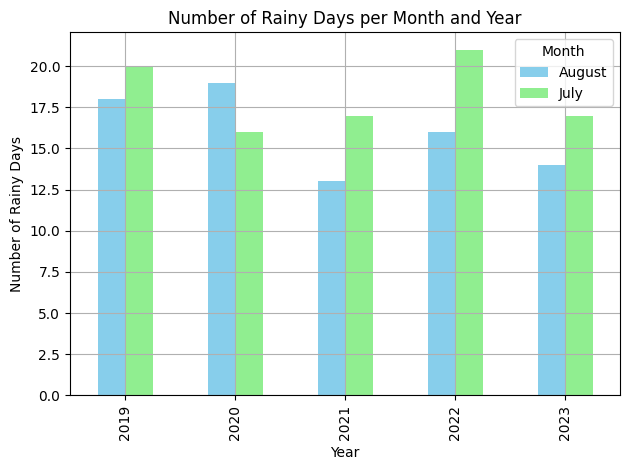

In [ ]:

# Plot Number of Rainy Days
plt.figure(figsize=(12, 8))
daily_rainy_days_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Rainy Days per Month and Year')
plt.ylabel('Number of Rainy Days')
plt.xlabel('Year')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

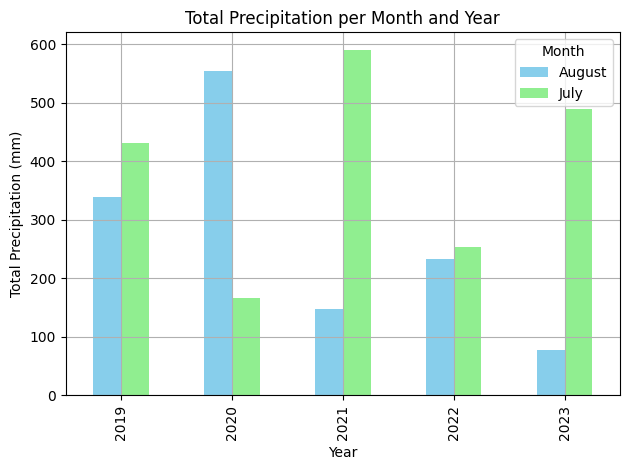

In [ ]:

# Plot Total Precipitation
plt.figure(figsize=(12, 8))
total_precipitation_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Total Precipitation per Month and Year')
plt.ylabel('Total Precipitation (mm)')
plt.xlabel('Year')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

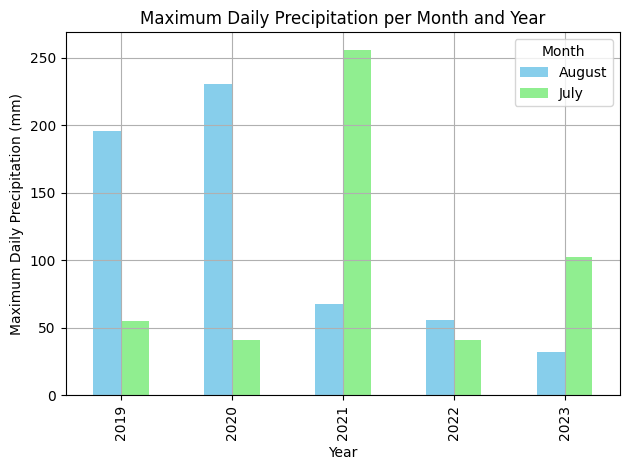

In [ ]:

# Plot Maximum Daily Precipitation
plt.figure(figsize=(12, 8))
max_daily_precipitation_df.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Maximum Daily Precipitation per Month and Year')
plt.ylabel('Maximum Daily Precipitation (mm)')
plt.xlabel('Year')
plt.legend(title='Month')
plt.grid(True)
plt.tight_layout()
plt.show()

            year  month    precip
date                             
2019-07-01  2019      7  312.5216
2019-08-01  2019      8  320.4250
2020-07-01  2020      7  140.3430
2020-08-01  2020      8  486.1200
2021-07-01  2021      7  559.3490
2021-08-01  2021      8  147.1190
2022-07-01  2022      7  190.6140
2022-08-01  2022      8  172.5200
2023-07-01  2023      7  367.1870
2023-08-01  2023      8   74.4030
ADF Statistic: -2.607623534281189
p-value: 0.09143185241382623
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
ADF Statistic: -2.845997953507136
p-value: 0.051997735871600684
Critical Values: {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}


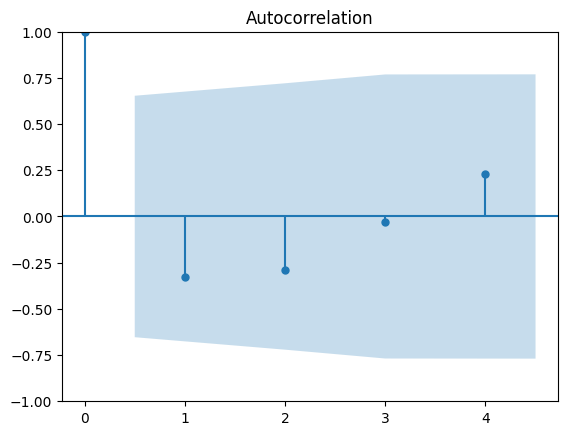

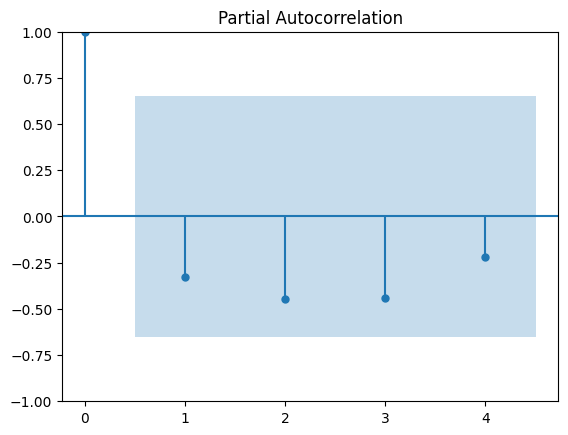

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Aggregate to monthly data
monthly_data = daily_data.groupby(['year', 'month'])['precip'].sum().reset_index()
monthly_data['date'] = pd.to_datetime(monthly_data[['year', 'month']].assign(day=1).astype(str).agg('-'.join, axis=1))
monthly_data.set_index('date', inplace=True)
monthly_data.sort_index(inplace=True)
print(monthly_data)
# Check for stationarity
def test_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')

test_stationarity(monthly_data['precip'])

# Differencing if necessary
monthly_data['diff'] = monthly_data['precip'].diff().dropna()
test_stationarity(monthly_data['diff'].dropna())

# Plot ACF and PACF to determine parameters
plot_acf(monthly_data['diff'].dropna())
plot_pacf(monthly_data['diff'].dropna())
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the training and test split
train_size = int(len(monthly_data) * 0.8)  # Use 80% of data for training
train_data, test_data = monthly_data.iloc[:train_size], monthly_data.iloc[train_size:]

# Fit the ARIMA model on the training data
model = ARIMA(train_data['precip'], order=(1, 1, 1))
model_fit = model.fit()

# Generate predictions for the test set
forecast = model_fit.forecast(steps=len(test_data))

# Actual values from the test set
actual = test_data['precip'].values

# Calculate performance metrics
mae = mean_absolute_error(actual, forecast)
mse = mean_squared_error(actual, forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 154.70925999456085
Mean Squared Error (MSE): 26949.06083965999
Root Mean Squared Error (RMSE): 164.1616911452242


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

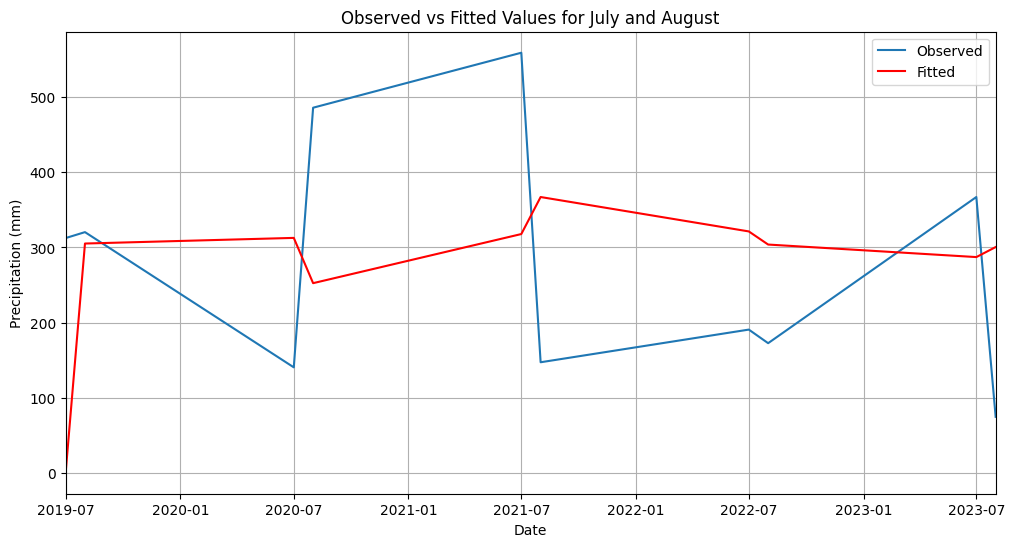

In [ ]:
# Plot the observed vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precip'], label='Observed')
plt.plot(monthly_data.index, model_fit.fittedvalues, label='Fitted', color='red')
plt.title('Observed vs Fitted Values for July and August')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)

# Focus x-axis on July and August
plt.xlim([monthly_data.index.min(), monthly_data.index.max()])
plt.show()

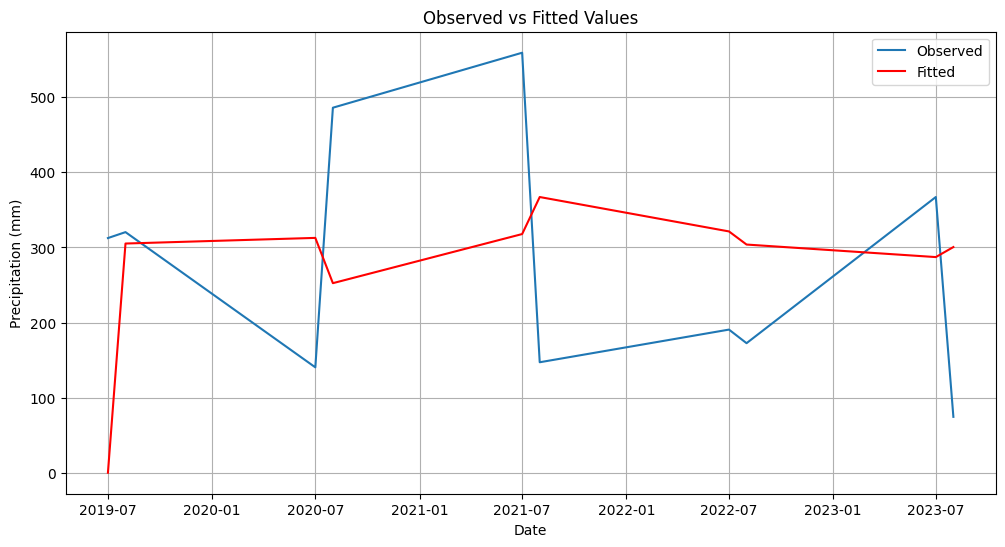

In [ ]:
# Plot the observed vs. fitted values
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precip'], label='Observed')
plt.plot(monthly_data.index, model_fit.fittedvalues, label='Fitted', color='red')
plt.title('Observed vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


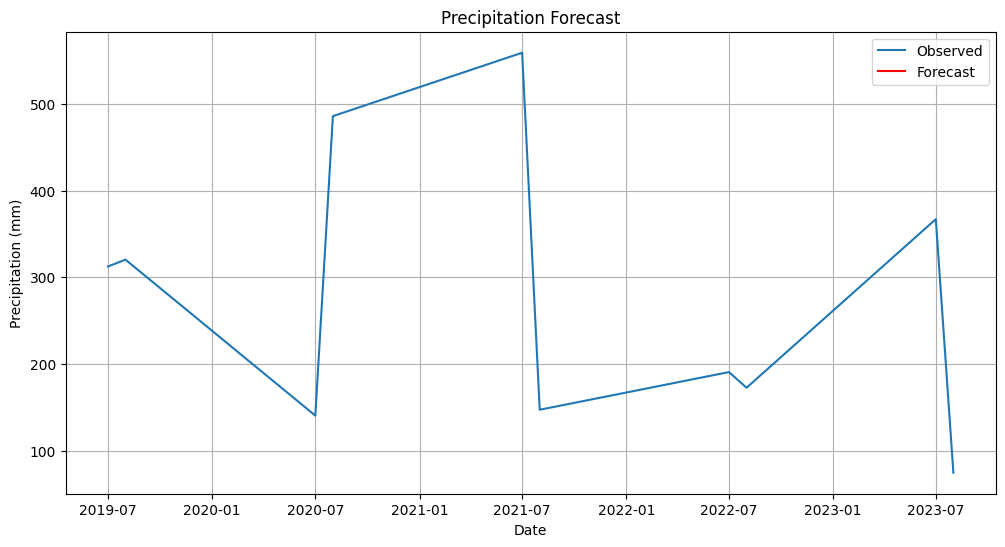

In [ ]:

# Forecast future values
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months ahead
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['precip'], label='Observed')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('Precipitation Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import warnings

In [10]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the dataset
file_path = '/content/2019-2023_july_to_aug_weather (1).csv'
weather_data = pd.read_csv(file_path)

# Combine date and time into a single datetime column with the correct format
weather_data['datetime'] = pd.to_datetime(weather_data['date'] + ' ' + weather_data['time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop rows with NaT in the datetime column
weather_data = weather_data.dropna(subset=['datetime'])

# Drop the original date and time columns
weather_data = weather_data.drop(columns=['date', 'time'])

# Filter data for July and August
weather_data = weather_data[weather_data['datetime'].dt.month.isin([7, 8])]

# Aggregate the data on a monthly basis
weather_data.set_index('datetime', inplace=True)
monthly_data = weather_data['precip'].resample('M').sum()

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the training and test split
train_size = int(len(monthly_data) * 0.8)  # Use 80% of data for training
train_data, test_data = monthly_data.iloc[:train_size], monthly_data.iloc[train_size:]

# Fit the SARIMA model on the training data
sarima_model = SARIMAX(train_data['precip'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Generate predictions for the test set
forecast = sarima_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Actual values from the test set
actual = test_data['precip'].values

# Calculate performance metrics
mae = mean_absolute_error(actual, forecast_mean)
mse = mean_squared_error(actual, forecast_mean)
rmse = np.sqrt(mse)

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

Mean Absolute Error (MAE): 146.392
Mean Squared Error (MSE): 23761.093289000004
Root Mean Squared Error (RMSE): 154.1463372545712


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


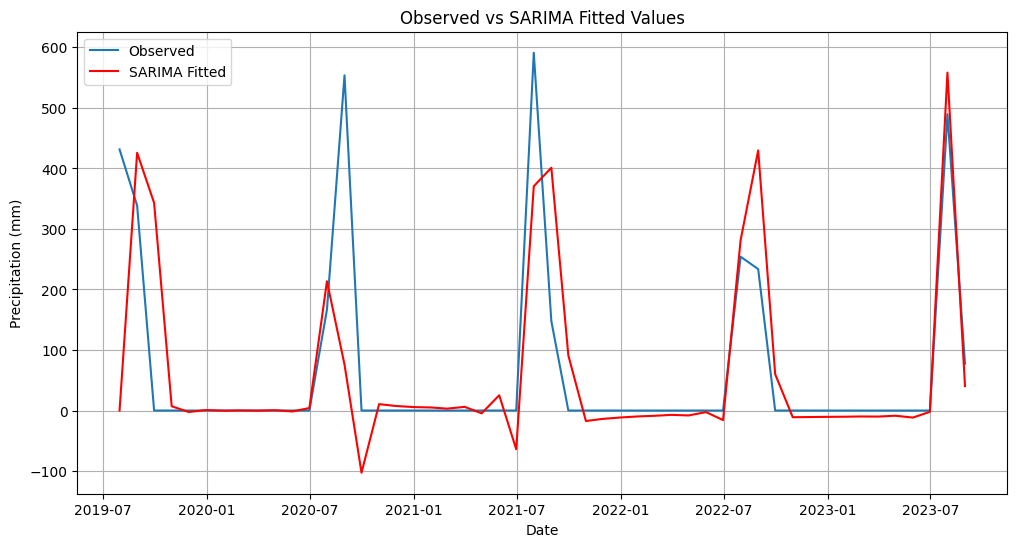

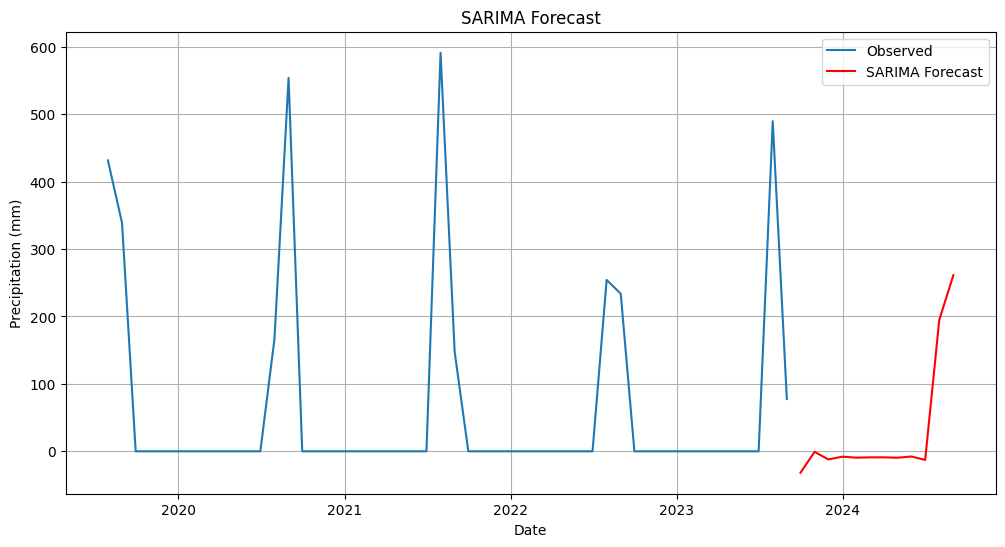

In [ ]:
# Plot the observed vs. fitted values for SARIMA
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(monthly_data.index, sarima_fit.fittedvalues, label='SARIMA Fitted', color='red')
plt.title('Observed vs SARIMA Fitted Values')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Forecast future values using SARIMA
sarima_forecast = sarima_fit.get_forecast(steps=12)
sarima_forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]
sarima_forecast_series = pd.Series(sarima_forecast.predicted_mean, index=sarima_forecast_index)

# Plot the SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(sarima_forecast_series.index, sarima_forecast_series, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# **Auto Arima**

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=448.546, Time=3.88 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=482.863, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=447.967, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=456.725, Time=1.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=480.925, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=475.217, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=446.597, Time=0.90 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=459.514, Time=0.37 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=450.226, Time=0.73 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=447.423, T

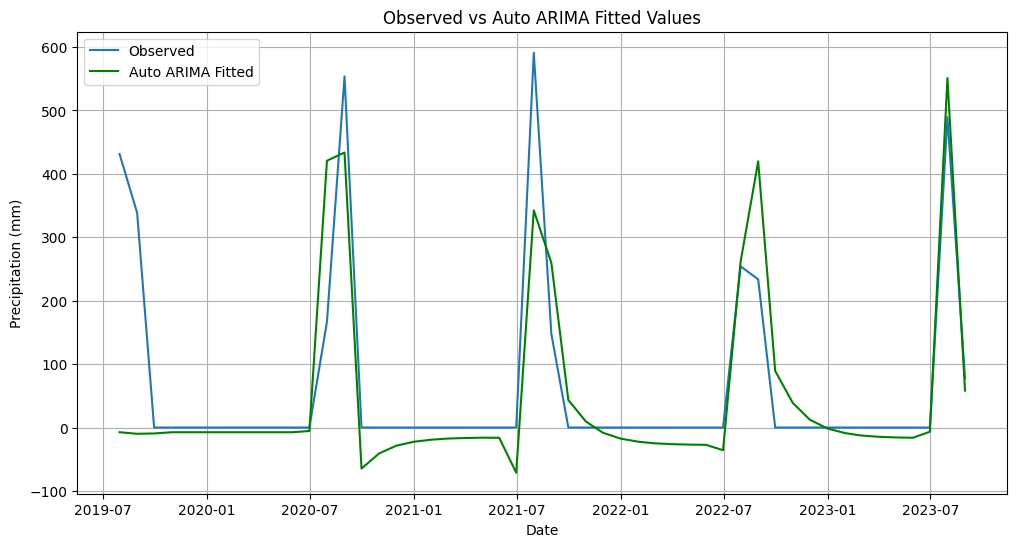

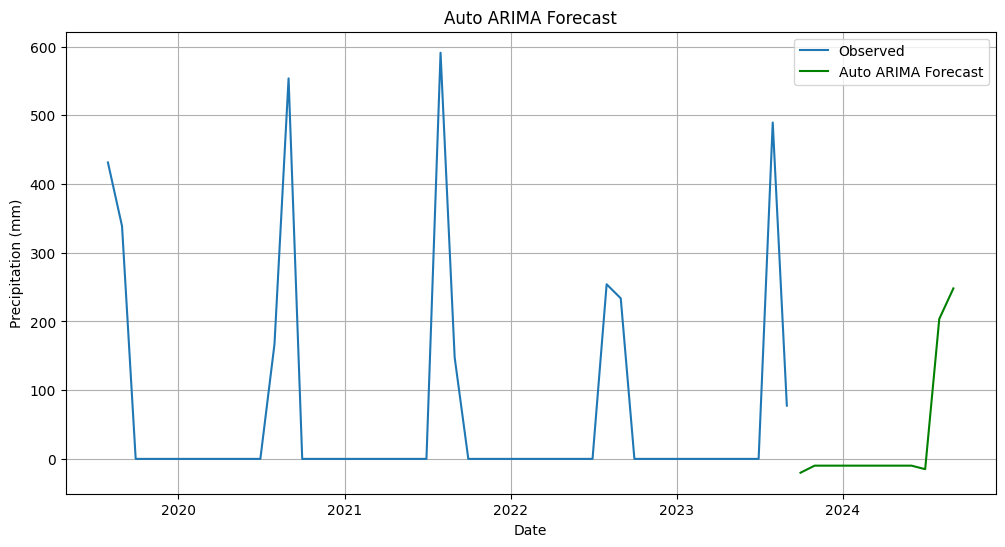

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Suppress warnings
warnings.filterwarnings('ignore')

# Read the dataset
file_path = '/content/2019-2023_july_to_aug_weather (1).csv'
weather_data = pd.read_csv(file_path)

# Combine date and time into a single datetime column with the correct format
weather_data['datetime'] = pd.to_datetime(weather_data['date'] + ' ' + weather_data['time'], format='%d/%m/%Y %H:%M', errors='coerce')

# Drop rows with NaT in the datetime column
weather_data = weather_data.dropna(subset=['datetime'])

# Drop the original date and time columns
weather_data = weather_data.drop(columns=['date', 'time'])

# Filter data for July and August
weather_data = weather_data[weather_data['datetime'].dt.month.isin([7, 8])]

# Aggregate the data on a monthly basis
weather_data.set_index('datetime', inplace=True)
monthly_data = weather_data['precip'].resample('M').sum()

# Fit Auto ARIMA model
auto_arima_model = auto_arima(monthly_data, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima_fit = auto_arima_model.fit(monthly_data)

# Print Auto ARIMA model summary
print(auto_arima_fit.summary())

# Calculate in-sample predictions and errors
in_sample_predictions = auto_arima_fit.predict_in_sample()
mae = mean_absolute_error(monthly_data, in_sample_predictions)
mse = mean_squared_error(monthly_data, in_sample_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((monthly_data - in_sample_predictions) / monthly_data)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot the observed vs. fitted values for Auto ARIMA
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(monthly_data.index, in_sample_predictions, label='Auto ARIMA Fitted', color='green')
plt.title('Observed vs Auto ARIMA Fitted Values')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Forecast future values using Auto ARIMA
auto_arima_forecast = auto_arima_fit.predict(n_periods=12)
auto_arima_forecast_index = pd.date_range(start=monthly_data.index[-1], periods=13, freq='M')[1:]
auto_arima_forecast_series = pd.Series(auto_arima_forecast, index=auto_arima_forecast_index)

# Plot the Auto ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(auto_arima_forecast_series.index, auto_arima_forecast_series, label='Auto ARIMA Forecast', color='green')
plt.title('Auto ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()
